In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [9]:
def read_file(filename):
  img=cv2.imread(filename)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)

  plt.show()
  return img

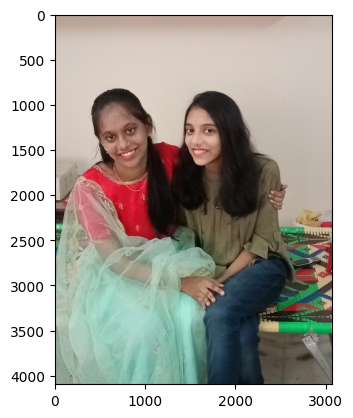

In [52]:
filename="/content/IMG20220503120352.jpg"
img=read_file(filename)
ord_img=np.copy(img)

In [53]:
def edge_mask(img,line_size,blur_value):

  """ input:input image
      output:Edge of images
  """
  gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  gray_blur=cv2.medianBlur(gray,blur_value)
  edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
  return edges


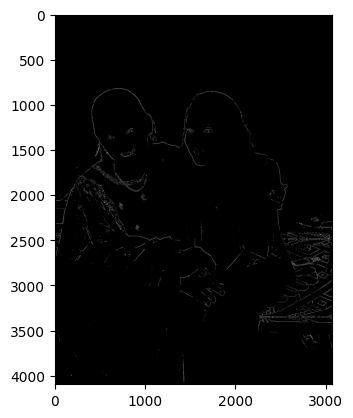

In [56]:
line_size,blur_value=5,7
edge=edge_mask(img,line_size,blur_value)
plt.imshow(edge,cmap="binary")
plt.show()


In [57]:
def color_quantization(img,k):
  data=np.float32(img).reshape((-1,3))
  criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
  ret ,label , center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  center=np.uint8(center)
  result=center[label.flatten()]
  result=result.reshape(img.shape)
  return result


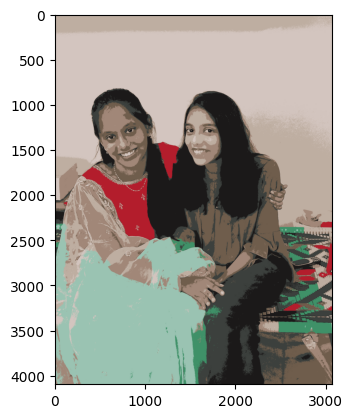

In [58]:
img=color_quantization(img,k=9)
plt.imshow(img)
plt.show()

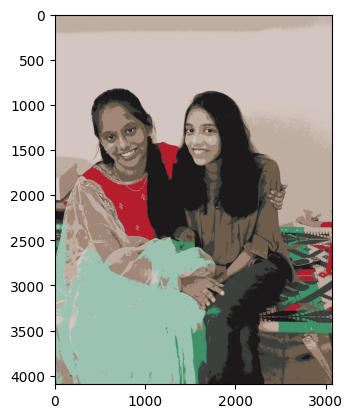

In [59]:
blurred=cv2.bilateralFilter(img,d=3,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()

In [60]:
def cartoon():
  c=cv2.bitwise_and(blurred,blurred,mask=edge)
  plt.imshow(c)
  plt.title("cartooned")
  plt.show()
  plt.imshow(ord_img)
  plt.title("real image")
  plt.show()

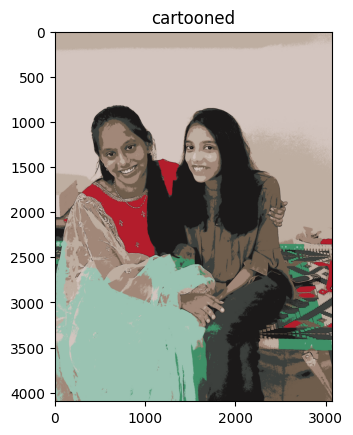

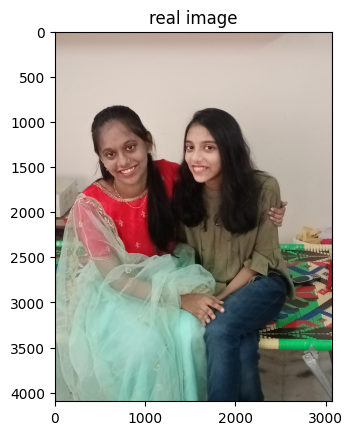

In [61]:
cartoon()